2689/2689 ━━━━━━━━━━━━━━━━━━━━ 69s 23ms/step - loss: 0.0012
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


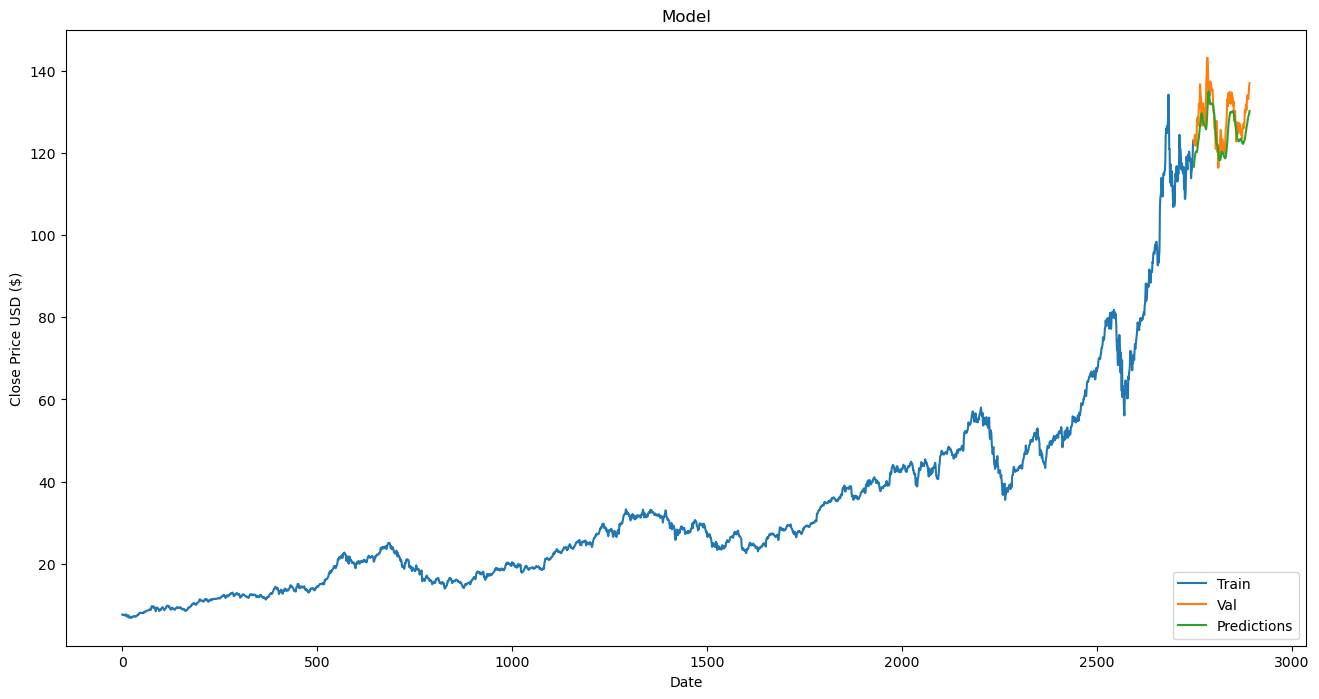

Close  Predictions
2749  122.940002   116.637657
2750  122.250000   117.695648
2751  123.750000   118.480759
2752  124.379997   119.226982
2753  121.779999   119.923302
...          ...          ...
2888  133.410004   128.414383
2889  133.110001   128.896973
2890  134.779999   129.197571
2891  136.330002   129.589249
2892  136.960007   130.160004

[144 rows x 2 columns]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1262325600&period2=1625097600&interval=1d&events=history&includeAdjustedClose=true')
df.head()

# Prepare the data
data = df.filter(['Close'])
dataset = data.values

# Split the data into training and testing datasets
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
valid


1548/1548 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - loss: 0.0147
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step


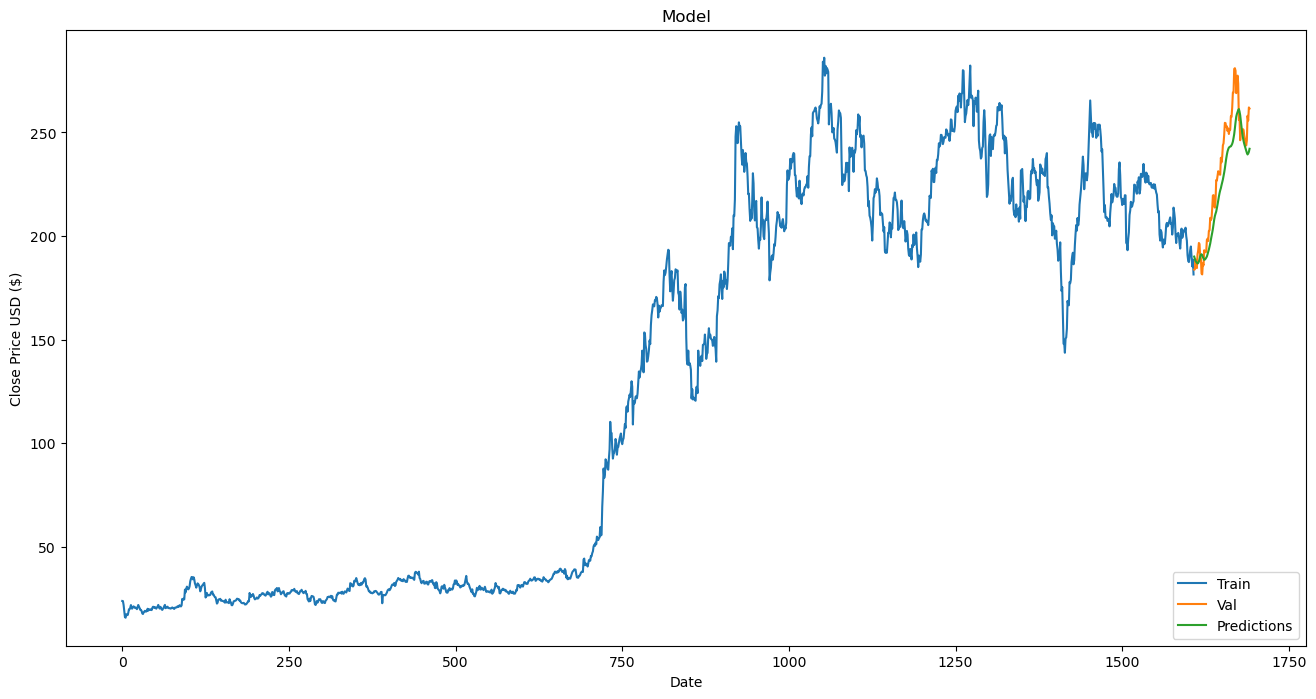

Close  Predictions
1608  183.770004   190.076080
1609  183.929993   188.955444
1610  188.660004   187.966293
1611  185.020004   187.523285
1612  184.520004   187.107925
...          ...          ...
1687  246.169998   240.106918
1688  258.000000   239.352768
1689  255.729996   239.799683
1690  262.049988   240.600494
1691  261.500000   242.092407

[84 rows x 2 columns]